<a href="https://colab.research.google.com/github/anderson-ferreira-83/Data_Science_Repo_anderson83/blob/main/1_Alura_Voz/Week_3_models/p3_Models_for_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 3 - Model Analysis

In [1]:
import os  # Provides functions for interacting with the operating system
import sys  # Provides access to system-specific parameters and functions

In [2]:
import pandas as pd  # Data manipulation and analysis with tabular data (DataFrames)

Having processed and analyzed the data, we can now build classification models that will be useful for Alura Voz. Among the models we can create are SVC, Decision Tree and Random Forest.

### Importing libraries

For the application we will use `pandas`, `seaborn`, `sklearn`, `imblearn` and `sys`. To learn more about the sklearn and imblearn libraries, access the documentation:
- [Scikit Learn](https://scikit-learn.org/stable/); and
- [Imbalanced Learn](https://imbalanced-learn.org/stable/).

In [3]:
str_utils = '1DJEF0jli6eQixbcz-ARBX7X5d9ojoP4J' # Link to access the functions of model
!gdown --id $str_utils # Downloading file to current GoogleColab directory 'utils.py'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1DJEF0jli6eQixbcz-ARBX7X5d9ojoP4J
From (redirected): https://drive.google.com/uc?id=1DJEF0jli6eQixbcz-ARBX7X5d9ojoP4J&confirm=t&uuid=2741b0f4-8321-41c8-816e-ff247b847aa7
To: /content/utils.py
100% 6.37k/6.37k [00:00<00:00, 15.6MB/s]


In [6]:
from utils import plot_countplot, plot_matrix_confusion, compare_models_metrics  # Imports custom utility functions for plotting and model evaluation

In [7]:
import pandas as pd  # Data manipulation and analysis with tabular data (DataFrames)
import seaborn as sns  # Statistical data visualization with aesthetic graphics
from imblearn.over_sampling import SMOTE  # Handles imbalanced datasets using oversampling techniques
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.preprocessing import OneHotEncoder  # Encodes categorical variables using One-Hot Encoding
from sklearn.svm import SVC  # Support Vector Machine implementation for classification or regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree implementation for classification or regression
from sklearn.ensemble import RandomForestClassifier  # Random Forest implementation using decision trees for ensemble learning

sns.set_theme(style="darkgrid")  # Sets the default style for Seaborn plots to 'darkgrid'
SEED = 42  # Sets a fixed random seed for reproducibility


### Applying encoder

The database is read using the pandas `read_json` method.

In [9]:
# Link to access the shared database file 'Telco-Customer-Churn-clean.json'
str_data_telco_cust_chrun_clean_file = '1--WyhFs-oY4xjPXyHd5Qatpio-2Z4zFa'
# Downloading file to current GoogleColab directory 'Telco-Customer-Churn-clean.json'
!gdown --id $str_data_telco_cust_chrun_clean_file

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1--WyhFs-oY4xjPXyHd5Qatpio-2Z4zFa
To: /content/Telco-Customer-Churn-clean.json
100% 2.22M/2.22M [00:00<00:00, 160MB/s]


In [10]:
# Reading database
data_db = pd.read_json('Telco-Customer-Churn-clean.json')
data_db.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Now, we need to remove some columns that are not so important for the analysis we want to perform. The method that allows us to remove columns is `drop()` from the pandas library.

There are two columns that are not interesting for the analysis and that will be removed:

* `customerID` column: Its value is unique for each row and does not provide us with relevant information for an analysis, so we can remove it; and
* `Charges.Total` column: this column contains information about the months of `Charges.Monthly` multiplied by `tenure`, so it is "duplicate" information.

In [12]:
data_db.drop(['customerID', 'Charges.Total'], axis=1, inplace=True) #

Let's print the classes of each column that is of the categorical type to understand which treatments and where they can be performed.

In [13]:
#
for i in data_db.select_dtypes(include=['object']).columns:
    if len(data_db[i].unique()) > 2:
       print(f"{i}: {data_db[i].unique()}")

MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


It is possible to notice that some columns have the class `No phone service` and `No internet service` which is equivalent to the class `No`, that is, there is no service. For these classes, we will consider them as `No` to avoid duplicate information. Since there will be only two results `Yes` and `No`, we will replace them with a binary number, 1 and 0.

In addition, the columns 'PaymentMethod', 'Contract' and 'InternetService' have more than 2 categories and because of this, we will encode the data of these columns.

In [14]:
#
cols = ['PaymentMethod', 'Contract', 'InternetService']
#
data2 = data_db.drop(cols, axis=1)
#
data2.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'Charges.Monthly'],
      dtype='object')

In [15]:
#
dictionary = {'No internet service':0,
              'No phone service': 0,
              'No': 0,
              'Yes': 1,
              'Male':0,
              'Female':1}

In [16]:
#
data2 = data2.replace(dictionary)
#
data2.head()

<ipython-input-16-aec97c09401c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2 = data2.replace(dictionary)


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly
0,0,1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6
1,0,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9
2,1,0,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9
3,1,0,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0
4,1,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9


There are several ways to create encoding, two of which are Label Encoding and One-Hot Encoding.

#### Types of encoding

* `Label Encoding` - Renames classes with numeric values ​​from 1 to n, where n is the number of classes. There may be a hierarchy between classes.

* `One-Hot Encoding` - Transforms variables into n binary columns, where n is the number of classes. All classes are analyzed equally; when a class occurs, the column will have the value 1 and when it does not occur, the value 0, which happens for the other columns created.

In our case, we will choose the method that transforms variables into binary columns. To learn more about this method, see the documentation.

- [OneHotEncoder documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

It is also possible to prepare this form of encoding with pandas [`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). If you want to know more about this method and the first one, we recommend reading the article [Pandas Get Dummies (One-Hot Encoding) – pd.get_dummies()](https://amiradata.com/pandas-get-dummies/).

Feel free to test both ways.

In [17]:
#
ohe = OneHotEncoder(dtype=int)
ohe

OneHotEncoder(dtype=<class 'int'>)

In [18]:
#
cols_ohe = ohe.fit_transform(data_db[cols]).toarray()
cols_ohe

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

In [19]:
#
import sklearn
print(sklearn.__version__)


1.6.0


In [20]:
# get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
ohe.get_feature_names_out(cols)

array(['PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'], dtype=object)

In [21]:
#
data3 = pd.concat([data2, pd.DataFrame(cols_ohe, columns=ohe.get_feature_names_out(cols))], axis=1)

In [22]:
#
data3

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,0,1,1,9,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,9,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
7039,1,0,0,1,0,22,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
7040,0,0,0,0,0,2,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
7041,0,0,0,1,1,67,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0


Now we have data with only numeric values.

## Data balancing

/content/utils.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x, hue=hue, data=data_db, palette=colors)


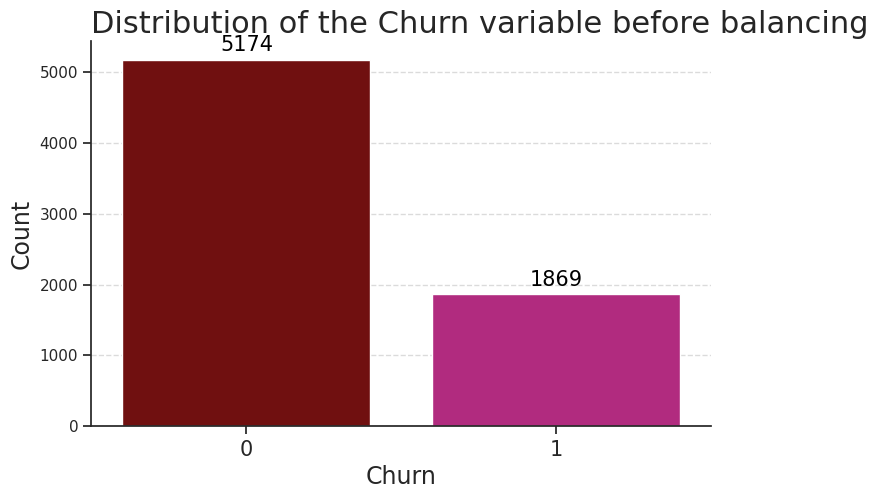

In [23]:
#
plot_countplot(data_db=data3,
               x='Churn',
               titulo="Distribution of the Churn variable before balancing",
               label_x='Churn')

We can see from the graph above that the dataset has the **target** (column `'Churn'`) [unbalanced](https://www.alura.com.br/artigos/lidando-com-desbalanceamento-dados?utm_source=gnarus&utm_medium=timeline). If the model is created with the variable in this way, it may harm the learning and results.

To avoid problems in the model's learning, we will perform the balancing using the [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) method from the imblearn library.

In [24]:
#
X = data3.drop(['Churn'], axis = 1)
y = data3['Churn']

In [25]:
#
sm = SMOTE(random_state=SEED)
X_res, y_res = sm.fit_resample(X, y)

In [26]:
#
data4 = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)

/content/utils.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=x, hue=hue, data=data_db, palette=colors)


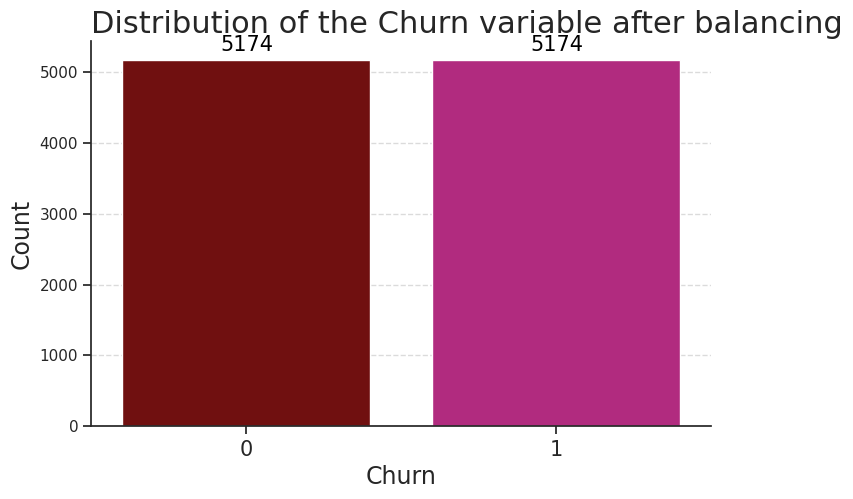

In [27]:
#
plot_countplot(data_db=data4,
               x='Churn',
               titulo="Distribution of the Churn variable after balancing",
               label_x='Churn')

Now, `data4` has the values ​​of the **target** column with the same quantities, that is, they are balanced. Therefore, we will use `data4` to build the classification models.

In [28]:
#
data4.to_json('Telco-Customer-Churn-balancing.json')

## Creating the models

To start training, separate the data into **training** and **test**.

In [29]:
#
X_train, X_test, y_train, y_test = train_test_split(X_res , y_res, random_state=SEED)

### 1. SVC

The first model to be assembled is the **SVC** classifier. To assemble it, we use the [SVC method from the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

To learn more about this method, you can access the video [Nonlinear estimators and support vector machines from the Machine Learning course: introduction to classification with SKLearn](https://cursos.alura.com.br/course/machine-learning-introducao-a-classificacao-com-sklearn/task/46782).

In [30]:
#
svc = SVC(random_state=SEED)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

After training the model, we need to know how well it performed in its training. To do this, we collect the classifications from a data set unknown to the model, the test set.

The responses from the evaluation of each item in the test set performed by the model can be checked to know how well it performed in its test. The evaluation consists of analyzing several metrics that inform the success of the model. The metrics we will evaluate are [**Accuracy**](https://cursos.alura.com.br/course/machine-learning-credit-scoring/task/92910), [**Precision, Recall and F1 Score**](https://cursos.alura.com.br/course/machine-learning-credit-scoring/task/92914) and the [**Confusion Matrix**](https://cursos.alura.com.br/course/machine-learning-credit-scoring/task/92912)

We obtain these metrics using the `plot_matriz_confusao()` function to analyze the final result of the model.

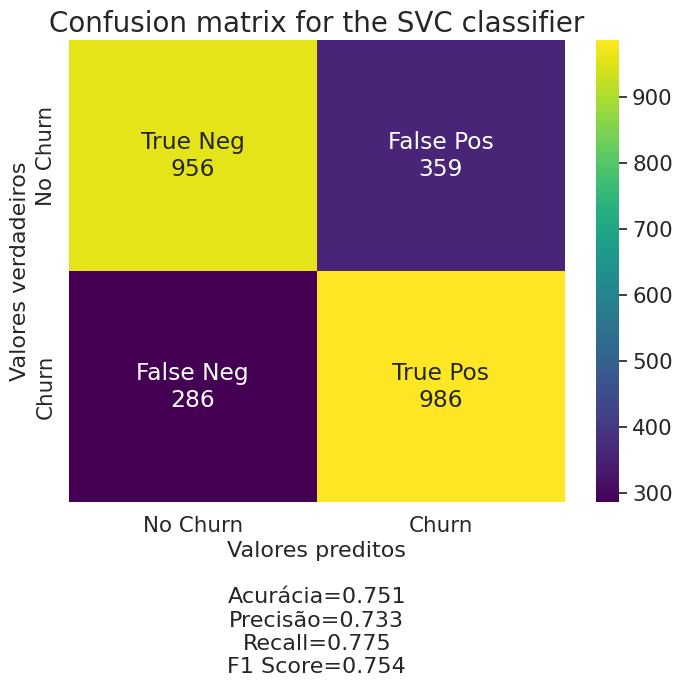

In [31]:
#
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["No Churn", "Churn"]
plot_matrix_confusion(y_test,
                      y_pred_svc,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6),
                      title="Confusion matrix for the SVC classifier")

### 2. Decision Tree

The second model to be assembled is the **Decision Tree** classifier. To assemble it, we use the [Decision Tree method from the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

To learn more about this method, you can watch the video [Decision Trees: delving deeper into Machine Learning models](https://cursos.alura.com.br/course/arvores-decisao-aprofundando-modelos-machine-learning).

After training the model, we test it and plot the confusion matrix and other metrics using the `plot_matriz_confusao()` function to analyze the final result of the model.

In [32]:
#
dtree = DecisionTreeClassifier(max_depth=5, random_state = SEED)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

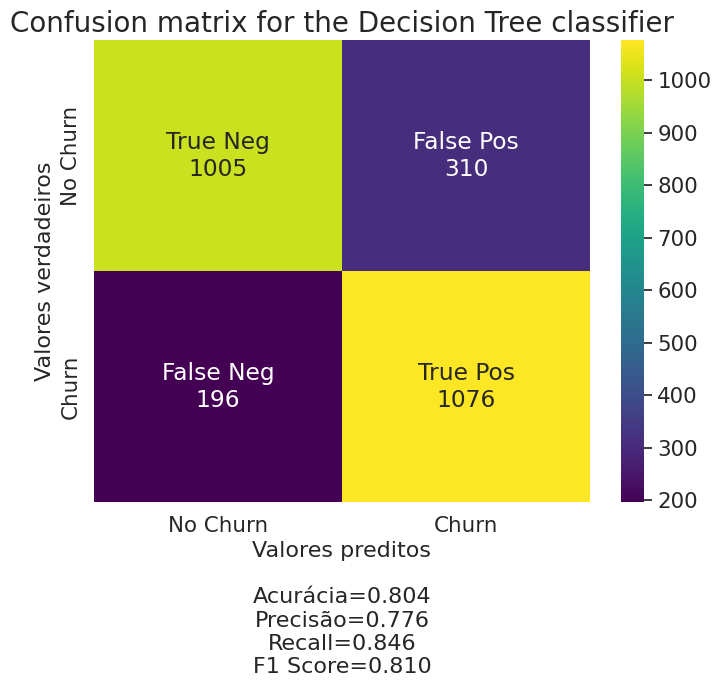

In [33]:
#
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["No Churn", "Churn"]
plot_matrix_confusion(y_test,
                      y_pred_dt,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6),
                      title="Confusion matrix for the Decision Tree classifier")

### 3. Random Forest

The second model to be assembled is the **Decision Tree** classifier. To assemble it, we use the [Random Forest method from the sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

To learn more about this method, you can watch the video [Decision Trees: delving deeper into Machine Learning models](https://cursos.alura.com.br/course/arvores-decisao-aprofundando-modelos-machine-learning).

After training the model, we test it and plot the confusion matrix and other metrics using the `plot_matriz_confusao()` function to analyze the final result of the model.

In [34]:
#
rforest = RandomForestClassifier(max_depth = 5, random_state=SEED)
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)

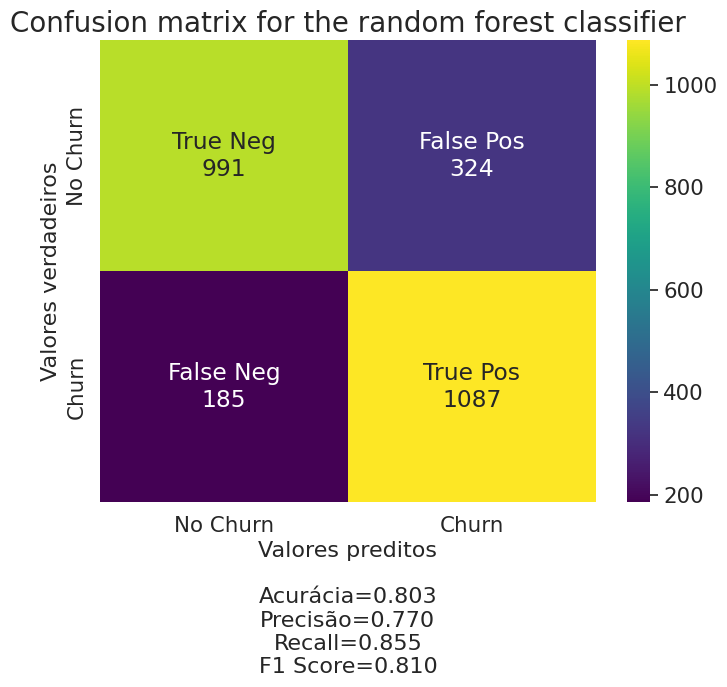

In [35]:
#
labels = ["True Neg","False Pos","False Neg","True Pos"]
categories = ["No Churn", "Churn"]
plot_matrix_confusion(y_test,
                      y_pred_rf,
                      group_names=labels,
                      categories=categories,
                      figsize=(8, 6),
                      title="Confusion matrix for the random forest classifier")

### Comparing the models

After training and testing the **SVC**, **Decision Tree** and **Random Forest** models, we can compare the results obtained to find the best model.

To do this, we collect the classification metrics of the three models and group them in a comparison table.

In [36]:
#
models = ['svc', 'decision tree', 'random forest']
#
y_pred_train = [svc.predict(X_train), dtree.predict(X_train), rforest.predict(X_train)]
#
y_pred_test = [y_pred_svc, y_pred_dt, y_pred_rf]

In [37]:
#
table_models = compare_models_metrics('Recall', models, y_train, y_pred_train, y_test, y_pred_test).round(2)
table_models

,Modelo,Acurácia Treino,Acurácia Teste,Precisão,Recall,F1-Score
0,random forest,0.81,0.80,0.77,0.85,0.81
1,decision tree,0.81,0.80,0.78,0.85,0.81
2,svc,0.75,0.75,0.73,0.78,0.75
